In [10]:
# Import the necessary packages for analyzing our data.

%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the dataset and save it as variable named nfl.

nfl = pd.read_csv('season_2021.csv')

# Inspect first 5 rows to see what the data looks like.

nfl.head()

,team_name,week,day,date,result,opponent,tm_score,opp_score,1stD_offense,TotYd_offense,PassY_offense,RushY_offense,TO_offense,1stD_defense,TotYd_defense,PassY_defense,RushY_defense,TO_defense
0,Arizona Cardinals,1,Sun,September 12,W,Tennessee Titans,38,13,22,416,280,136,1,17,248,162,86,3
1,Arizona Cardinals,2,Sun,September 19,W,Minnesota Vikings,34,33,21,474,371,103,2,22,419,242,177,0
2,Arizona Cardinals,3,Sun,September 26,W,Jacksonville Jaguars,31,19,23,407,316,91,1,20,361,202,159,4
3,Arizona Cardinals,4,Sun,October 3,W,Los Angeles Rams,37,20,27,465,249,216,0,24,401,280,121,2
4,Arizona Cardinals,5,Sun,October 10,W,San Francisco 49ers,17,10,20,304,210,94,1,19,338,186,152,1


In [12]:
# Tally up and print all the different outcomes from the 'result' column.

nfl['result'].value_counts()

result
W    284
L    284
T      2
Name: count, dtype: int64

In [13]:
# Dictionary containing the numerical values we want to replace our W's, L's, and T's with.
result_encoder = {'result': {'W': 1, 'T': 0, 'L': 0}}

# The replace method looks for values in our DataFrame that match the keys in result_encoder
# and replaces them with the corresponding value.
# inplace writes over the original values instead of returning a new DataFrame.
nfl.replace(result_encoder, inplace = True)

nfl['result'].value_counts()

result
0    286
1    284
Name: count, dtype: int64

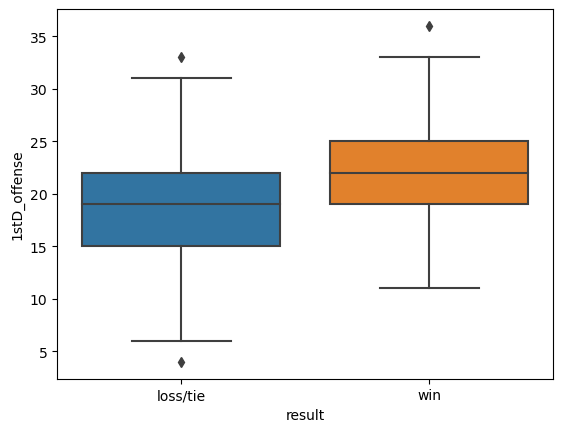

In [14]:
# Choosing a stat in our DataFrame to run a test plot with.
stat = '1stD_offense'

# Create box plot of test stat.
stat_plot = sns.boxplot(x = 'result', y = stat, data = nfl)

# Plot labels for our two categories: losses/ties and wins.
stat_plot.set_xticklabels(['loss/tie', 'win'])
plt.show()

In [15]:
# Select feature variables to be scaled.  
# In this case, we want all the rows, and only the columns at index 8 onwards.
features = nfl.iloc[:, 8:]

# Create a scaler.
scaler = StandardScaler()

# Fit the transformer to the features.
scaler.fit(features)

# Transform and save as X
X = scaler.transform(features)

In [16]:
# Save result variable as y
y = nfl['result']

In [17]:
# Split the data into training and testing data.
# Training data we'll use to train our model to recognize winning games from patterns in the game stats.
# Testing data we'll use to check our model's accuracy.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [18]:
# Create a LogisticRegression() classifier.
lrc = LogisticRegression()

# Fit the classifier to the training data.
lrc.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Predict with our classifier (lrc) using the X_test test features.
y_pred = lrc.predict(X_test)

# View the model accuracy. Check the percentage of outcomes that our model predicted correctly
# by comparing our predicted test values (y_pred) to the true values (y_test).
accuracy_score(y_test, y_pred)

0.8280701754385965